# Text Mining and Sentiment Analysis For Hotel/Restaurant Reviews

In [1]:
! pip install pandas
! pip install numpy
! pip install nltk
! pip install wordcloud
! pip install vader
! pip install matplotlib
! pip install cufflinks


In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import nltk
import wordcloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
dataframe = pd.read_csv('tourist-accommodation-reviews.xls', encoding='cp1252')

In [4]:
# Data Analysis

In [5]:
dataframe.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [6]:
dataframe.shape

(53644, 5)

In [7]:
dataframe.columns

Index(['ID', 'Review Date', 'Location', 'Hotel/Restaurant name', 'Review'], dtype='object')

In [8]:
dataframe.dtypes

ID                       object
Review Date              object
Location                 object
Hotel/Restaurant name    object
Review                   object
dtype: object

In [9]:
dataframe.isnull().sum()

ID                       0
Review Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64

In [10]:
dataframe = dataframe.drop_duplicates()
dataframe.shape

(49944, 5)

1. There are 53644 rows and 5 columns in the original dataset.
2. All the columns are of text data type.
3. There is no null values in any of the column.
4. There are duplicate values in the dataset and we have removed them.

In [11]:
locationDf = dataframe[['ID', 'Location']].groupby(['Location']).count()
locationDf.sort_values(by='ID', ascending=False)

,ID
Location,
Patong,15112
Kata Beach,5433
Karon,5296
Rawai,3471
Choeng Thale,3218
Phuket Town,3126
Kamala,2932
Mai Khao,2242
Cape Panwa,1500


<b>Question: Why we choose these hotels?</b> </br>
Answer: There are many Locations in the dataset that has more than 3000 reviews. We have picked up the top Location with maximum number of reviews i.e Patong

In [12]:
patongDf = dataframe.loc[dataframe.Location==' Patong']
patongDf.shape

(15112, 5)

In [13]:
len(patongDf['Hotel/Restaurant name'].unique())

164

In [14]:
# how we picked the hotels

In [15]:
#allPatongHotels = list(set(patongDf['Hotel/Restaurant name']))
#allPatongHotels = allPatongHotels[:60]
#print(allPatongHotels)

In [16]:
allPatongHotels = ['Irish Times Pub', 'Fuji Japanese Restaurant - Jungceylon Patong', 'Khon Kaen Buffet BBQ', 'La Gritta', 'P.S. Hotel', 'Acqua Restaurant', 'Pizzeria Hut 1', "Joe's Downstairs", 'EuroThai Restaurant', 'Bondi Aussie Bar & Grill Phuket', 'Sabai Sabai', 'Poo Nurntong Restaurant', 'No.6 Restaurant', 'Badsha Indian Food', 'Pizzeria Da Moreno', 'Sabai Beach Restaurant', "Full Moon Brewworks - Microbrewery & Lobs n' Roll", 'Elephant No.9 Restaurant', 'Kantok Restaurant at Burasari Resort', 'Sandwich Shoppe Cafe & Bar Patong Phuket', 'Restaurant Georgia', 'Salsa Mexicana', 'Le Brooklyn Patong', 'Cafe Siam Breakfast Cafe', 'La Casa', 'Vista', 'Halfway Inn (Restaurant)', 'The Pizza Company', 'Trattoria Capri da Rico', '99 Seafood']

In [17]:
# selecting reviews of hotels in patong and renaming columns

In [18]:
subsetHotelDf = dataframe.loc[dataframe['Hotel/Restaurant name'].isin(allPatongHotels)]
subsetHotelDf = subsetHotelDf.rename(columns={'Hotel/Restaurant name':'hotel_restaurant_name'})
subsetHotelDf.shape

(3085, 5)

1. There are a total of 164 unique venues in the Patong Location.
2. We have randomly selected 30 out of these hotels to some text analysis and sentiment labelling.

In [19]:
subsetHotelDf.head()

,ID,Review Date,Location,hotel_restaurant_name,Review
3076,rn576042038,Reviewed 3 weeks ago,Patong,Le Brooklyn Patong,Great burgers at a fair price. Personnel were ...
3077,rn574177219,Reviewed 4 weeks ago,Patong,Le Brooklyn Patong,Tasty burgers with a fair price. 100% recommen...
3078,rn570140768,"Reviewed April 1, 2018",Patong,Le Brooklyn Patong,Visit was purely based on all the positive rev...
3079,rn566946785,"Reviewed March 16, 2018",Patong,Le Brooklyn Patong,After reading all the reviews we though we bet...
3080,rn566226061,"Reviewed March 13, 2018",Patong,Le Brooklyn Patong,After 2 months of Asian food we were really cr...


In [20]:
subsetHotelDf[['Location', 'hotel_restaurant_name']].groupby('hotel_restaurant_name').count()

,Location
hotel_restaurant_name,
99 Seafood,100
Acqua Restaurant,100
Badsha Indian Food,100
Bondi Aussie Bar & Grill Phuket,100
Cafe Siam Breakfast Cafe,100
Elephant No.9 Restaurant,59
EuroThai Restaurant,100
Fuji Japanese Restaurant - Jungceylon Patong,100
Full Moon Brewworks - Microbrewery & Lobs n' Roll,100


<AxesSubplot:ylabel='hotel_restaurant_name'>

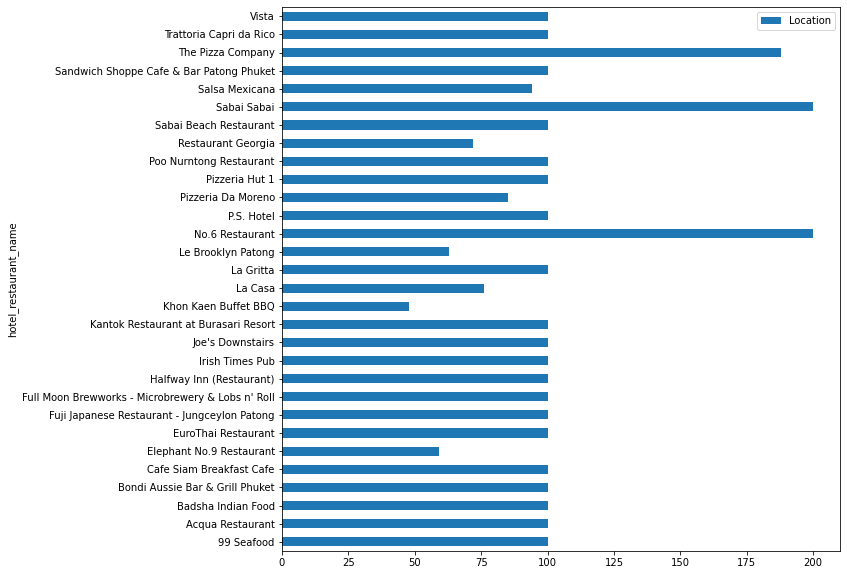

In [21]:
subsetHotelDf[['Location', 'hotel_restaurant_name']].groupby('hotel_restaurant_name').count().plot(kind='barh', figsize=(10,10))

1. Around 77% of the selected hotels have more than 100 reviews.

In [22]:
# Data Cleaning/ lematizing - getting root form of the word
import string, re
from nltk.stem import WordNetLemmatizer

In [23]:
subsetHotelDf = subsetHotelDf[['hotel_restaurant_name', 'Review']]
subsetHotelDf.head()

,hotel_restaurant_name,Review
3076,Le Brooklyn Patong,Great burgers at a fair price. Personnel were ...
3077,Le Brooklyn Patong,Tasty burgers with a fair price. 100% recommen...
3078,Le Brooklyn Patong,Visit was purely based on all the positive rev...
3079,Le Brooklyn Patong,After reading all the reviews we though we bet...
3080,Le Brooklyn Patong,After 2 months of Asian food we were really cr...


In [24]:
# converting review to lowercase, removing special characters, removing numbers from the review.

In [25]:
def clean_and_generate_new_review(rawReview):
    new_review = rawReview.lower().strip()
    new_review = new_review.translate(str.maketrans('', '', string.punctuation))
    new_review = re.sub(r'\d+', '', new_review)
    return new_review

In [26]:
# viewing the changes made

In [27]:
subsetHotelDf['NewReview'] = subsetHotelDf.Review.apply(clean_and_generate_new_review)

In [28]:
subsetHotelDf.head()

,hotel_restaurant_name,Review,NewReview
3076,Le Brooklyn Patong,Great burgers at a fair price. Personnel were ...,great burgers at a fair price personnel were g...
3077,Le Brooklyn Patong,Tasty burgers with a fair price. 100% recommen...,tasty burgers with a fair price recommend it ...
3078,Le Brooklyn Patong,Visit was purely based on all the positive rev...,visit was purely based on all the positive rev...
3079,Le Brooklyn Patong,After reading all the reviews we though we bet...,after reading all the reviews we though we bet...
3080,Le Brooklyn Patong,After 2 months of Asian food we were really cr...,after months of asian food we were really cra...


In [29]:
#removing stopwords

In [30]:
#import nltk
#nltk.download('stopwords')

In [31]:
#Tokenisation Remove Stop Words
stop_word_list = set(nltk.corpus.stopwords.words('english'))

def tokenise_and_stop_words_removal(NewReview):
    stop_words_removed_review = list()
    tokenised_review = nltk.tokenize.word_tokenize(NewReview)
    for word in tokenised_review:
        if word not in stop_word_list:
            stop_words_removed_review.append(word)
    newReview = " ".join(stop_words_removed_review)
    return newReview

In [32]:
#import nltk
#nltk.download('punkt')

In [33]:
subsetHotelDf['StopRemovedReview'] = subsetHotelDf.NewReview.apply(tokenise_and_stop_words_removal)
subsetHotelDf.head()

,hotel_restaurant_name,Review,NewReview,StopRemovedReview
3076,Le Brooklyn Patong,Great burgers at a fair price. Personnel were ...,great burgers at a fair price personnel were g...,great burgers fair price personnel great fast ...
3077,Le Brooklyn Patong,Tasty burgers with a fair price. 100% recommen...,tasty burgers with a fair price recommend it ...,tasty burgers fair price recommend staff also ...
3078,Le Brooklyn Patong,Visit was purely based on all the positive rev...,visit was purely based on all the positive rev...,visit purely based positive reviews however re...
3079,Le Brooklyn Patong,After reading all the reviews we though we bet...,after reading all the reviews we though we bet...,reading reviews though better try awesome burg...
3080,Le Brooklyn Patong,After 2 months of Asian food we were really cr...,after months of asian food we were really cra...,months asian food really craving good burger l...


In [34]:
# Lemmatization
word_lemmatizer = WordNetLemmatizer()

def lemmatize_review(StopRemovedReview):
    lemma_review = list()
    StopRemovedReview = StopRemovedReview.split()
    for word in StopRemovedReview:
        lemma_word = word_lemmatizer.lemmatize(word)
        lemma_review.append(lemma_word)
    return " ".join(lemma_review)

In [35]:
#import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [36]:
subsetHotelDf['CleanReview'] = subsetHotelDf.StopRemovedReview.apply(lemmatize_review)
subsetHotelDf.head()

,hotel_restaurant_name,Review,NewReview,StopRemovedReview,CleanReview
3076,Le Brooklyn Patong,Great burgers at a fair price. Personnel were ...,great burgers at a fair price personnel were g...,great burgers fair price personnel great fast ...,great burger fair price personnel great fast f...
3077,Le Brooklyn Patong,Tasty burgers with a fair price. 100% recommen...,tasty burgers with a fair price recommend it ...,tasty burgers fair price recommend staff also ...,tasty burger fair price recommend staff also f...
3078,Le Brooklyn Patong,Visit was purely based on all the positive rev...,visit was purely based on all the positive rev...,visit purely based positive reviews however re...,visit purely based positive review however rev...
3079,Le Brooklyn Patong,After reading all the reviews we though we bet...,after reading all the reviews we though we bet...,reading reviews though better try awesome burg...,reading review though better try awesome burge...
3080,Le Brooklyn Patong,After 2 months of Asian food we were really cr...,after months of asian food we were really cra...,months asian food really craving good burger l...,month asian food really craving good burger le...


1. We have removed unncessary columns such as ID, Review Date and Location.
2. We converted the raw review to lower case.
3. White spaces/blank spaces are stripped of from both ends.
4. Punctuations and special characters are removed from the reviews.
5. Numbers are removed from the reviews.
6. The reviews are tokenized.
7. Stop words are removed from the reviews.
8. Lemmatization is performed to bring words to their root form in the reviews.

## Visualisations

In [37]:
#Joining words together
fullTextFromReviewList = list((subsetHotelDf['CleanReview'].values))
fullTextFromReview = ",".join(fullTextFromReviewList)

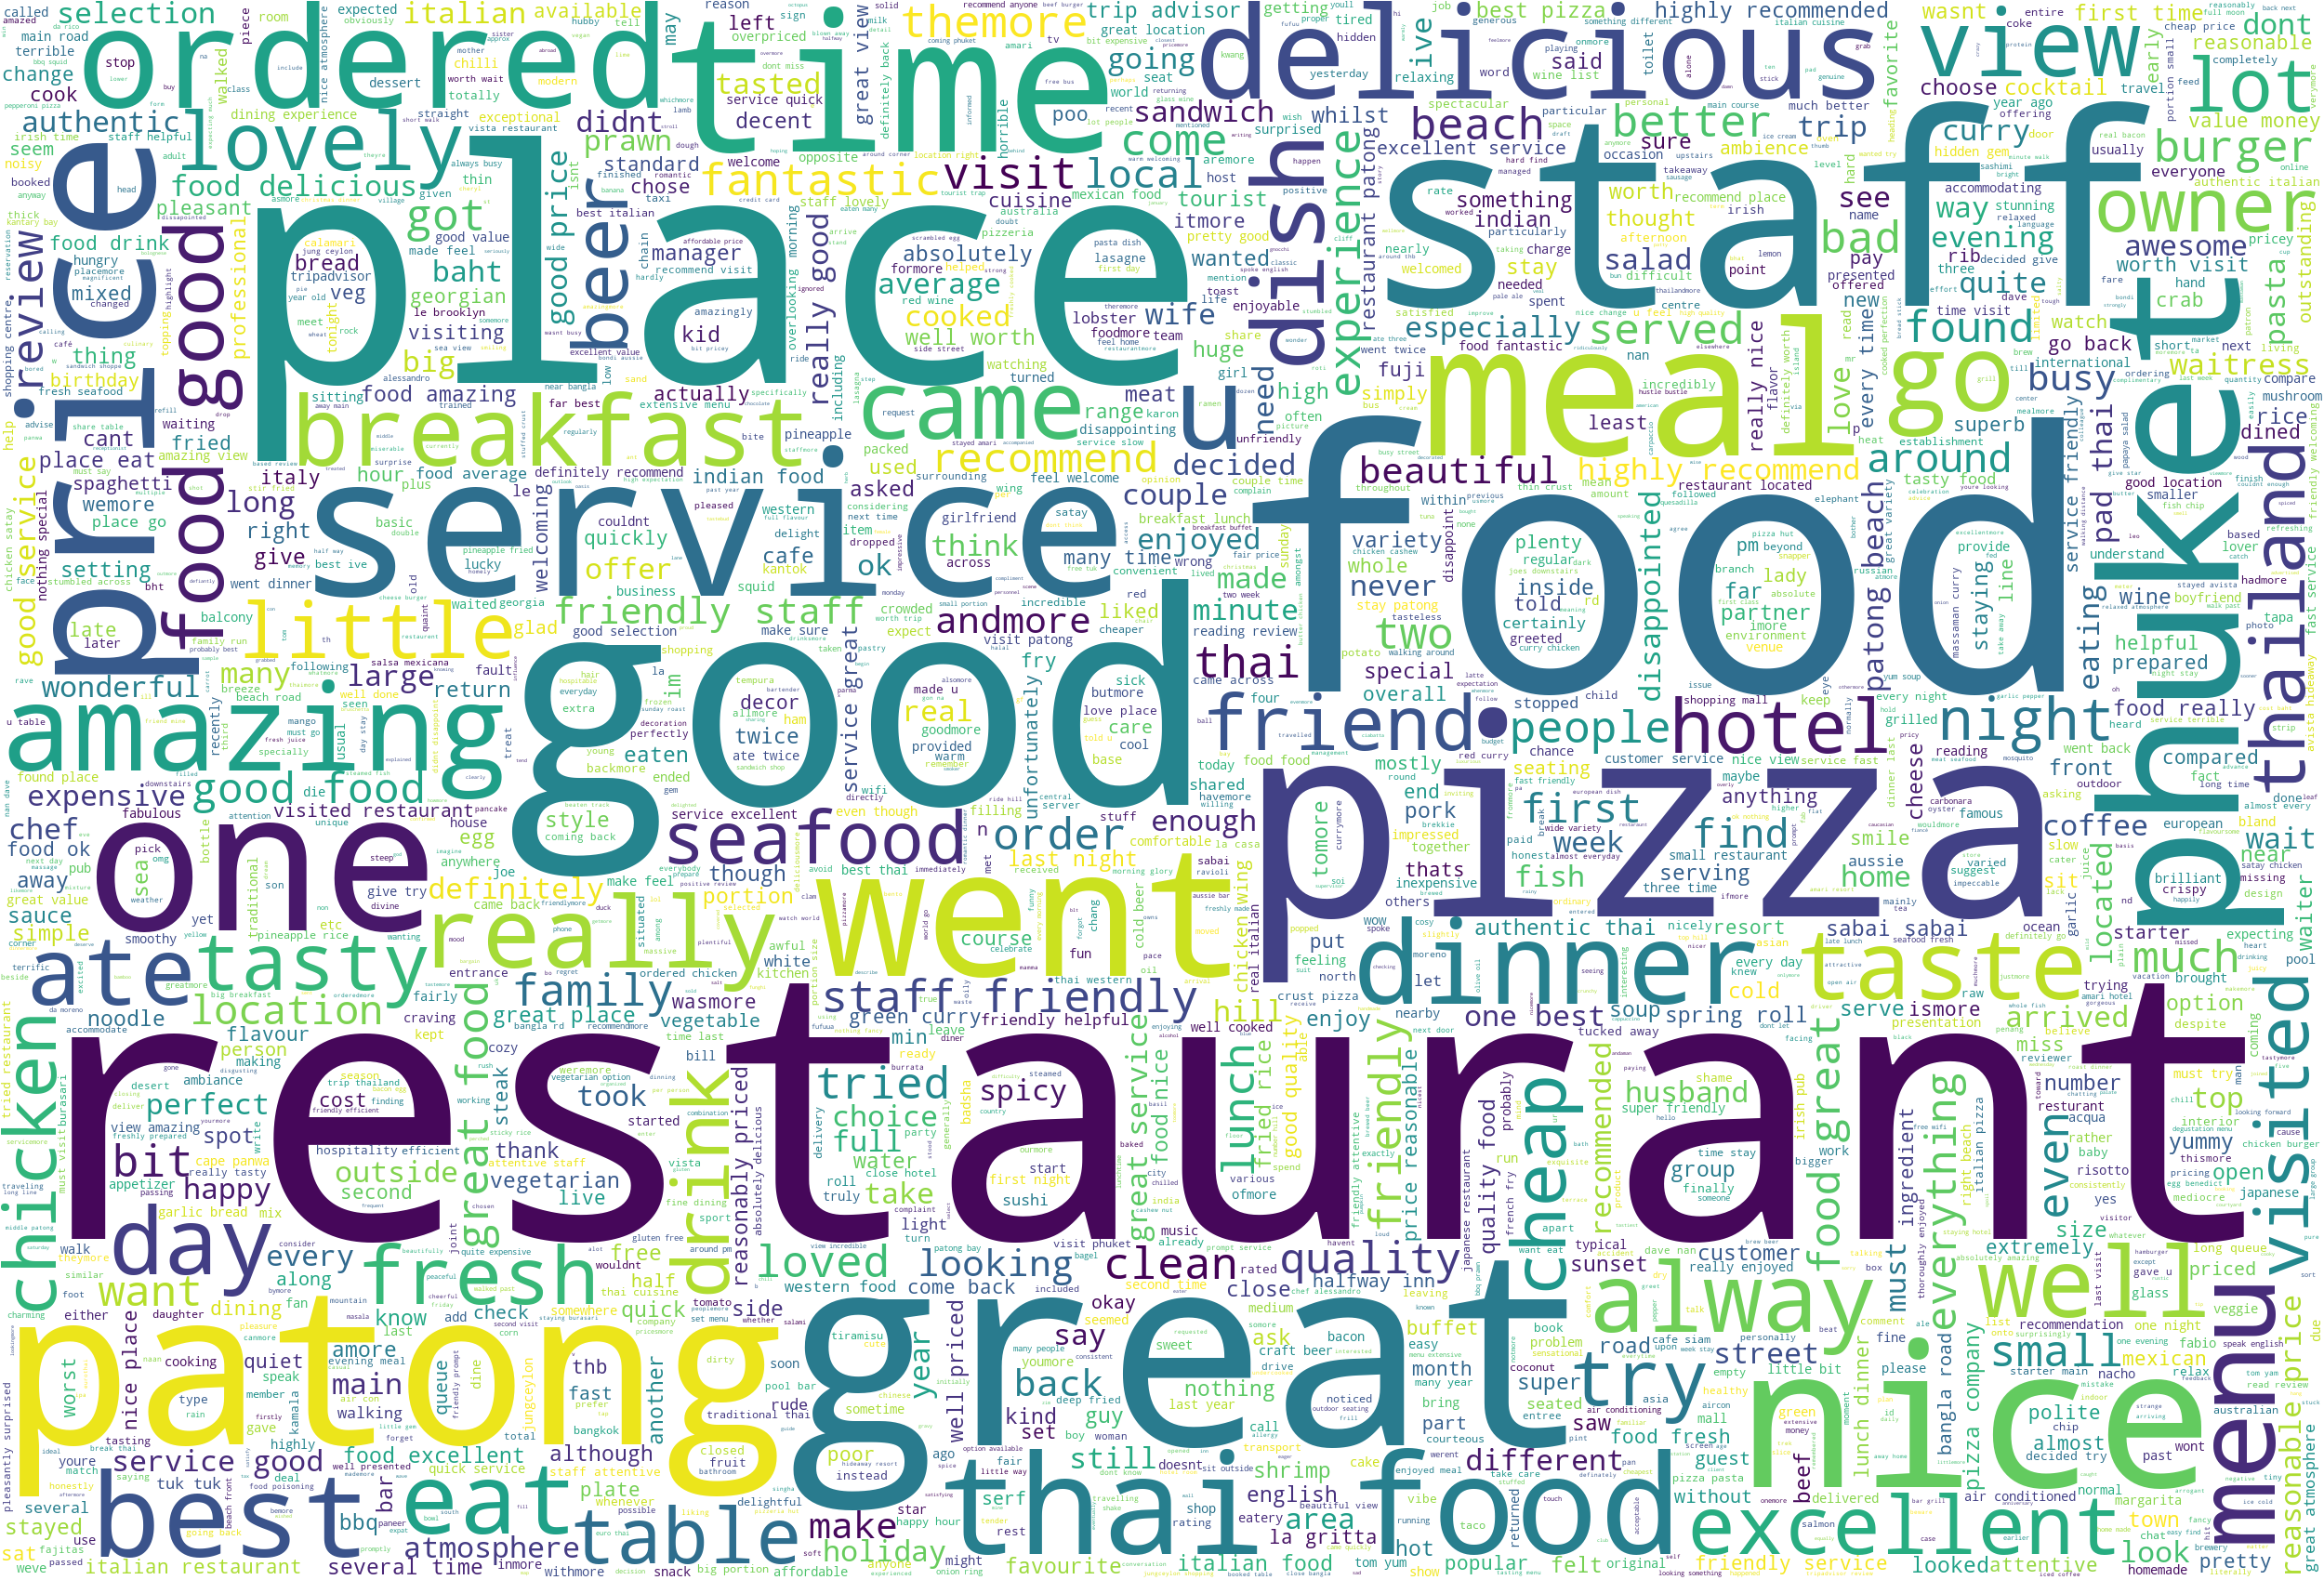

In [38]:
wordCloudObject = wordcloud.WordCloud(max_words=2000, width= 2500, height = 1700)
wordCloudObject.generate(fullTextFromReview).background_color="white"
wordCloudObject.to_image()

The above wordcloud is built after cleaning the text reviews. Customers have used words such as pizza, restaurant, food, place, patong, staff, nice, great, excellent, chicken, service, price, breakfast, etc dominantly in the reviews.

In [39]:
# Plotting UniGrams After Text Cleaning

text_list = subsetHotelDf['CleanReview'].tolist()
split_text_list = list()
for word in text_list:
    split_text_list.append(word.split(' '))

unigram_words = list()

for sub in split_text_list:
    for s in sub:
        unigram_words.append(s)

In [40]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [41]:
#plotting the 15 unique words used by customer in the review.

In [42]:
# PLotting Unigrams (one word)
uniDf = pd.Series(nltk.ngrams(unigram_words, 1)).value_counts().to_frame().reset_index()
uniDf.columns = ['word','count']
uniDf['word'] = uniDf.word.apply(lambda x: x[0])
uniDf.head(15).iplot(kind='bar', x='word', y='count', yTitle='Count', title='Top 15 Frequent words in Reviews')

In [43]:
# PLotting Bigrams
biDf = pd.Series(nltk.ngrams(unigram_words, 2)).value_counts().to_frame().reset_index()
biDf.columns = ['word','count']
biDf['word'] = biDf.word.apply(lambda x: ",".join(x))
biDf.head(15).iplot(kind='bar', x='word', y='count', yTitle='Count', title='Top 15 Frequnt Bigrams in Reviews')

1. Unigrams plot shows the most frequent single words used by the reviewers for the hotels. These words are food, good, restaurant, great, place, staff.
2. Bi-Grams plot shows us the combination of two words used by the customers. Since, we are analysing Thai hotels, people have used (thai, food) majority of the time in their reviews. People also reviewed about the good food and friendly staff employed in these hotels/restaurants.

## Sentiments Analysis with Vader

In [44]:
!pip install vaderSentiment

In [45]:
import vaderSentiment.vaderSentiment

In [46]:
# vader gives the sentiment of the review

In [47]:
vader_analzer = vaderSentiment.vaderSentiment.SentimentIntensityAnalyzer()

def calculate_score_with_label(CleanReview):
    sentiments = vader_analzer.polarity_scores(CleanReview)
#     print(sentiments)
    sentiments_score = sentiments['compound']
    if sentiments_score >= 0.5:
        return 'positive'
    elif sentiments_score <= -0.5 :
        return 'negative'
    else:
        return 'neutral'

In [48]:
subsetHotelDf['sentimentLabel'] = subsetHotelDf.CleanReview.apply(calculate_score_with_label)
subsetHotelDf.head()

,hotel_restaurant_name,Review,NewReview,StopRemovedReview,CleanReview,sentimentLabel
3076,Le Brooklyn Patong,Great burgers at a fair price. Personnel were ...,great burgers at a fair price personnel were g...,great burgers fair price personnel great fast ...,great burger fair price personnel great fast f...,positive
3077,Le Brooklyn Patong,Tasty burgers with a fair price. 100% recommen...,tasty burgers with a fair price recommend it ...,tasty burgers fair price recommend staff also ...,tasty burger fair price recommend staff also f...,positive
3078,Le Brooklyn Patong,Visit was purely based on all the positive rev...,visit was purely based on all the positive rev...,visit purely based positive reviews however re...,visit purely based positive review however rev...,positive
3079,Le Brooklyn Patong,After reading all the reviews we though we bet...,after reading all the reviews we though we bet...,reading reviews though better try awesome burg...,reading review though better try awesome burge...,positive
3080,Le Brooklyn Patong,After 2 months of Asian food we were really cr...,after months of asian food we were really cra...,months asian food really craving good burger l...,month asian food really craving good burger le...,positive


In [49]:
results_df = subsetHotelDf['sentimentLabel'].value_counts().to_frame().reset_index()
results_df.columns = ['sentimentLabel', 'count']
print(results_df)
results_df.head(15).iplot(kind='bar', x='sentimentLabel', y='count', yTitle='Count',color=['red','yellow','green'], title='Sentiments Analysis')

  sentimentLabel  count
0       positive   2411
1        neutral    576
2       negative     98


In [50]:
# Plotting Positive Review Venues in  patong

<AxesSubplot:title={'center':'Positive Reviews Hotels'}, xlabel='hotel_restaurant_name'>

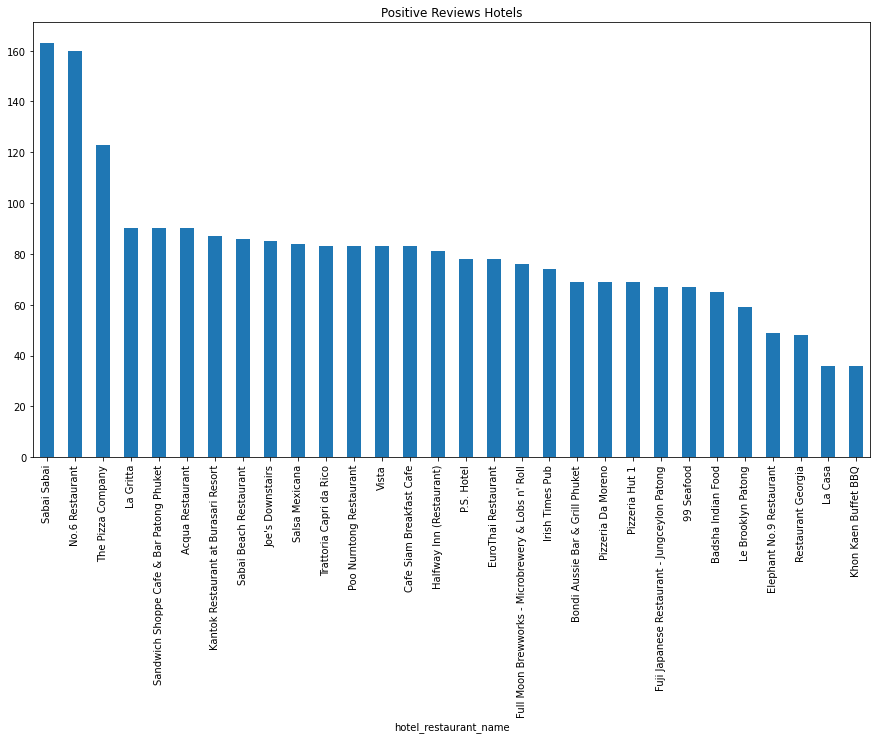

In [51]:
subsetHotelDf.loc[subsetHotelDf.sentimentLabel=='positive'][['hotel_restaurant_name', 'sentimentLabel']] \
                                .groupby('hotel_restaurant_name')  \
                                .count().sort_values(by='sentimentLabel', ascending=False).plot(kind='bar', figsize=(15,8), legend=False, title='Positive Reviews Hotels')

In [52]:
# Plotting Negative Review Venues

<AxesSubplot:title={'center':'Negative Reviwes Hotels'}, xlabel='hotel_restaurant_name'>

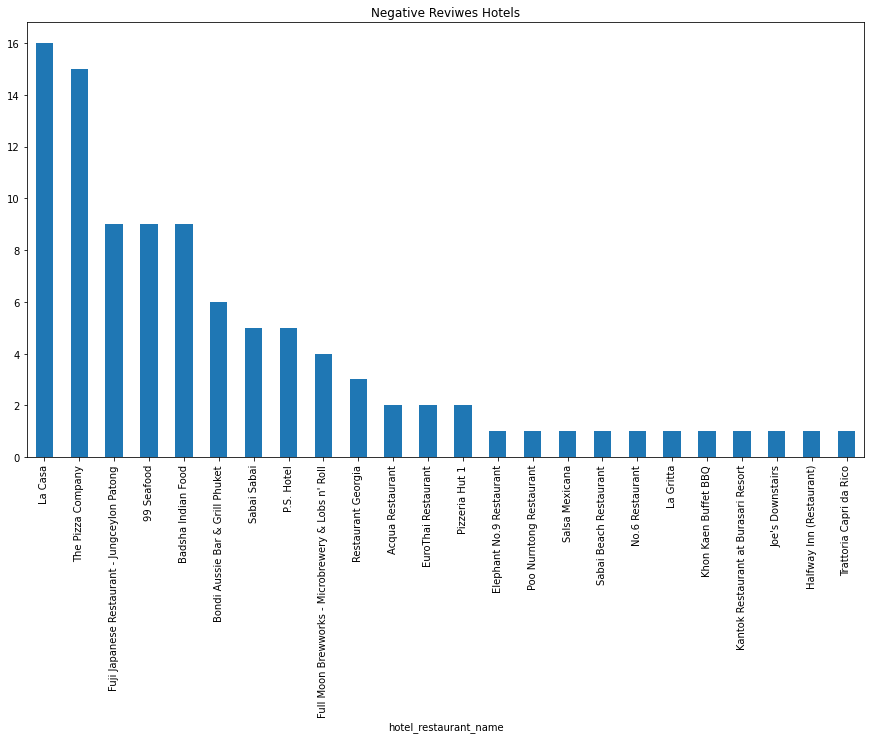

In [53]:
subsetHotelDf.loc[subsetHotelDf.sentimentLabel=='negative'][['hotel_restaurant_name', 'sentimentLabel']] \
                                    .groupby('hotel_restaurant_name').count() \
                                    .sort_values(by='sentimentLabel', ascending=False) \
                                    .plot(kind='bar', figsize=(15,8), legend=False, title='Negative Reviwes Hotels')

## CONCLUSION:

As we didn't have labels associated with our reviews, we can't train a classification model to predict the sentiment of a review. However, there are many libraries such as Vader, TextBlob, nltk and Flair that can give us the sentiement of a review with rule-based algorithms such as lexicon models. We have used Vader to find the sentiment of our reviews. </br></br>
It could be seen that more than 2400 reviews were positive followed by 576 neutral reviews. The number of negative reviews is minimum for these hotels (98 reviews). This could act as a good indicator for the new customers to visit any of these hotels as majority of them have positive feedback given by the customers.</br></br>
We have created plots for hotels with maximum positive and negative reviews recieved making it easier for the customers to finalise their choice of hotel.</br>
This should be noted that the bars for negative plot are long. However, the scale on the y-axis is very low (maximum 16) as compred to the y-axis scale of positive reviews plot (maximum 160). </br>

Hotel named 'Las Casa' received most of the negative reviews. Also, it has received very less number of positive reviews as compared to the other hotels/restaurants.